In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy.polynomial.polynomial as poly

In [2]:
f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_flat, agg_bs_flat, agg_cs_flat, phi2Ds_flat, cplxs_flat, dds_flat = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2Ds_rand, cplxs_rand, dds_rand, major_ax_zs, depths = pickle.load(f)
f.close()

In [38]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (7,7),
          'axes.labelsize': large,
          'xtick.labelsize': large,
          'ytick.labelsize': large,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

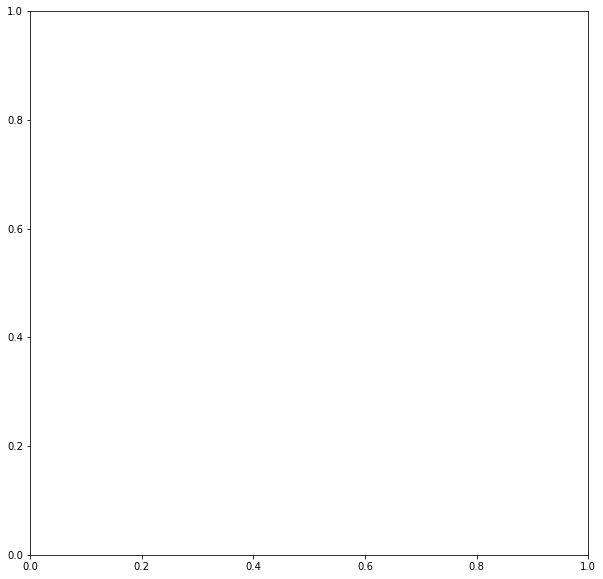

In [4]:
fig, axes = plt.subplots(1,1, figsize=(10,10), sharex=True, sharey=True);
plt.subplots_adjust(wspace=0, hspace=0);
Ns = np.arange(0,99,1)
phios = [0,2,3,4,6] #0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.

phica_rand = agg_cs_rand/agg_as_rand
phica_flat = agg_cs_flat/agg_as_flat
phiba_rand = agg_bs_rand/agg_as_rand
phiba_flat = agg_bs_flat/agg_as_flat

modes_rand_ba=[]
modes_rand_ca = []
modes_flat_ba=[]
modes_flat_ca=[]

for phio in phios:    
    for N in Ns:
#        print(i)
        data_rand = np.vstack([phiba_rand[phio,:,:,N], phica_rand[phio,:,:,N]])
        kde_rand = st.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[phio,:,:,N], phica_flat[phio,:,:,N]])
        kde_flat = st.gaussian_kde(data_flat)
        
        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)

        #modes
        modes_rand_ba.append(np.where(Z_rand==np.max(Z_rand))[0]/100)
        modes_rand_ca.append(np.where(Z_rand==np.max(Z_rand))[1]/100)

        modes_flat_ba.append(np.where(Z_flat==np.max(Z_flat))[0]/100)
        modes_flat_ca.append(np.where(Z_flat==np.max(Z_flat))[1]/100)
        

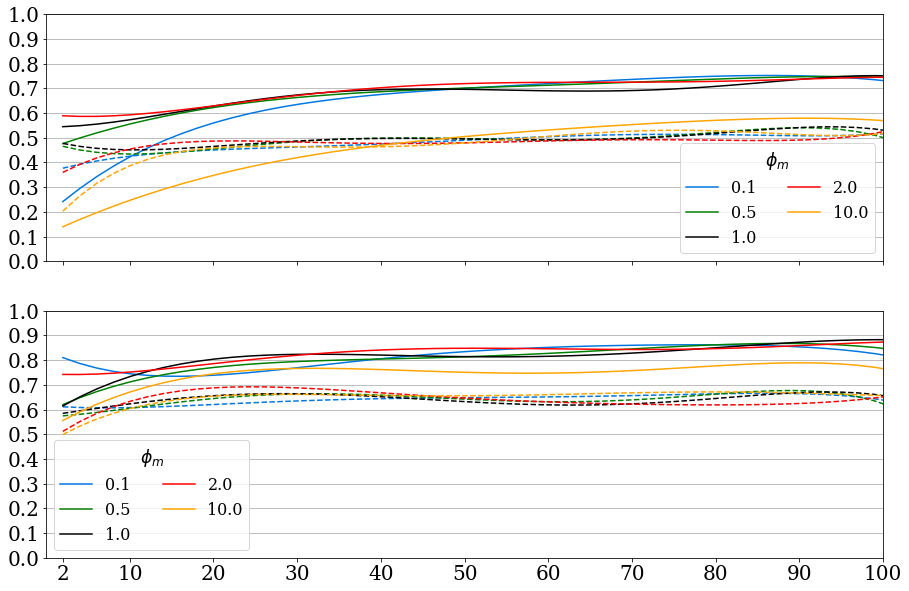

In [41]:
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Ns = np.arange(0,99,1)
phios = [0,2,3,4,6]  
phio_labels = [0.1, 0.5, 1.0, 2.0, 10.0]

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=2
Ns = np.arange(2,101,interval)

colors = ['#0077E0', 'green', 'k', 'red', 'orange']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
#     axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
#     axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, color=colors[phi], label=str(phio_labels[phi]))
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, linestyle='--', color=colors[phi])
    
    #axs[1].scatter(Ns, modes_rand_ca[phi,::interval],label=str(phio_labels[phi]), color=colors[phi])
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit, linestyle='-', color=colors[phi], label=str(phio_labels[phi]))
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit,'--', color=colors[phi])

plt.rcParams['legend.title_fontsize'] = 'xx-large'
axs[0].legend(title='$\phi_m$', ncol=2);
axs[1].legend(title='$\phi_m$', ncol=2);
axs[0].set_xlim(0.0,100)
axs[1].set_xlim(0.0,100)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
# axs[0].set_ylabel('$\phi_{ca}$', fontsize=30, fontfamily='serif')
# axs[1].set_ylabel('$\phi_{ba}$', fontsize=30, fontfamily='serif')
# axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])
axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')

plt.savefig('../plots/N_phi_asymptopte_bestfit.pdf', dpi=300)